In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Datasets
- Constructions 2020
- On-time 2020
- Traffic count 2020

In [7]:
DF = pd.read_csv("../../datasets/lane_closure.csv",low_memory=False)
DF = DF.rename(columns={"Primary Street":"Street","Cross Street":"At","Latitude":"Lat","Longitude":"Long"})
DF.loc[:,"Street"] = [" ".join(l[:-1]) for l in DF["Street"].str.split()]
DF.loc[:,"At"] = [" ".join(l[:-1]) for l in DF["At"].str.split()]
DF.loc[:,"Boundaries"] = DF["Boundaries"].str.split(" to ")
DF.loc[:,"Direction"] = DF["Direction"].str.split(" & ")
__clean_string = lambda l: [[[(float(j.split()[1]),float(j.split()[0])) for j in s.split(", ")] for s in m] for m in l.values]
DF.loc[:,"Geometry"] = __clean_string(DF["Geometry"].str.replace("MULTILINESTRING \(\(|\)\)","",regex=True).replace().str.split("\), \("))
# DF["Geometry"] = DF["Geometry"].str.strip("MULTILINESTRING \(|\)").str.split("\), \(")
# DF["Geometry"] = [[to_tuple_l(s,rev=True,dtype=float,strip_l="(|)",split_l=", ",split=" ") for s in m] for m in DF["Geometry"].values]
DF["Date Closed - From"] = pd.to_datetime(DF["Date Closed - From"]) 
DF["Date Closed - To"] = pd.to_datetime(DF["Date Closed - To"]) 

def _num_points(m): 
    set_i = set()
    for l in m: set_i |= set(l)
    return set_i 
DF["Num_Segments"] = [len(i) for i in DF["Geometry"].values]
DF["Num_Points"] = [len(_num_points(i)) for i in DF["Geometry"].values]

DF = DF.drop(columns=["Traffic Effect","Organization","Lane Closure ID","Modified Date","Inserted Date","Geometry Id","Status","KML","X","Y"])
DF

/Users/jasetran/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,Street,At,Boundaries,Direction,Date Closed - From,Date Closed - To,Time Closed - From,Time Closed - To,Complete Closure,Lat,Long,Geometry,Num_Segments,Num_Points
0,Bryce,River,"[River Av, End]","[Eastbound, Westbound]",2021-08-16,2021-10-16,12:00 AM,12:00 AM,No,49.879699,-97.142781,"[[(49.879153816388, -97.142387643857), (49.880...",1,3
1,Lilac,Carter,"[Carter Av, Weatherdon Av]",[Southbound],2021-06-14,2021-10-29,12:00 AM,12:00 AM,No,49.862454,-97.151445,"[[(49.862119196838, -97.151173092203), (49.862...",1,5
2,Princess,Pacific,"[Pacific Av, Rupert Av]",[Southbound],2020-08-14,2021-10-16,12:00 AM,12:00 AM,No,49.901786,-97.139766,"[[(49.90158994935, -97.139915854251), (49.9019...",1,3
3,Henry,Austin,"[Austin St, End]",[Westbound],2021-05-10,2021-11-30,12:00 AM,11:00 PM,No,49.903340,-97.134152,"[[(49.903503694415, -97.13466284795), (49.9033...",1,4
4,Grandin,Tache,"[Tache Av, St Joseph St]",[Eastbound],2021-05-31,2022-01-13,12:00 AM,12:00 AM,No,49.896013,-97.126315,"[[(49.895678857718, -97.127616387474), (49.896...",1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Sherbrook,Logan,"[Logan Av, William Av]",[Southbound],2021-09-20,2021-11-01,12:00 AM,12:00 AM,No,49.906584,-97.153705,"[[(49.904179261579, -97.155653416614), (49.904...",1,30
426,Gull Lake,Markham,"[Markham Rd, East Lake Dr]","[Northbound, Southbound]",2021-09-17,2021-10-08,12:00 AM,12:00 AM,No,49.809311,-97.158976,"[[(49.80730904568, -97.158914003228), (49.8081...",1,39
427,Wardlaw,Osborne,"[Osborne St, Scott St]",[Eastbound],2021-09-20,2021-10-15,12:00 AM,12:00 AM,No,49.877534,-97.142232,"[[(49.876961712509, -97.143938755153), (49.877...",1,5
428,Scotsborough,Beckinsale,"[Beckinsale By, Novavista Dr]",[Southbound],2021-09-23,2021-10-13,12:00 AM,12:00 AM,No,49.820905,-97.107388,"[[(49.820524519173, -97.107184511392), (49.820...",1,4


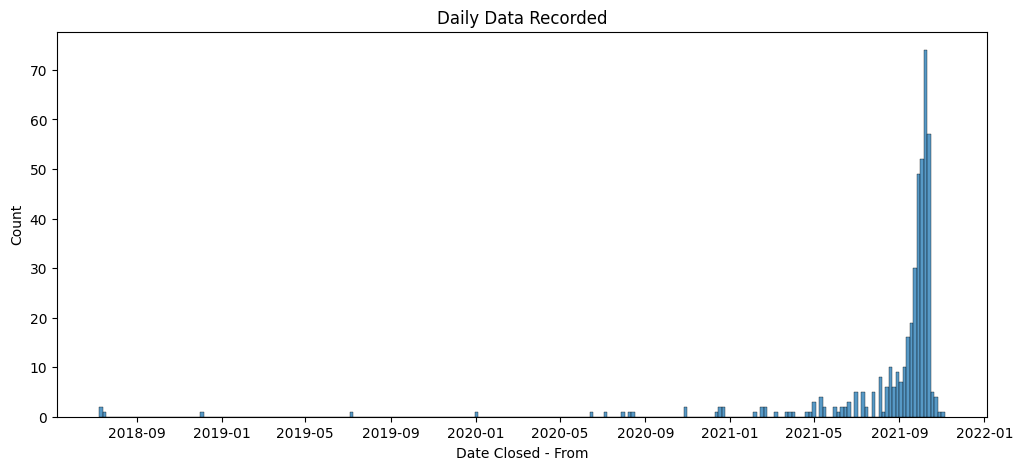

In [15]:
# DF.sort_values("Date Closed - From",ascending=True).head(50)
plt.figure(figsize=(12,5))
sns.histplot(DF,x="Date Closed - From",binwidth=5)
plt.title("Daily Data Recorded")
plt.show()

In [3]:
DF = pd.read_csv("../../datasets/lane_closure_2014-2020.csv",low_memory=False)
DF = DF.rename(columns={"Primary Street":"Street","Cross Street":"At","Latitude":"Lat","Longitude":"Long"})
DF.loc[:,"Street"] = [" ".join(l[:-1]) for l in DF["Street"].str.split()]
DF.loc[:,"At"] = [" ".join(l[:-1]) for l in DF["At"].str.split()]
DF.loc[:,"Boundaries"] = DF["Boundaries"].str.split(" to ")
DF.loc[:,"Direction"] = DF["Direction"].str.split(" & ")
__clean_string = lambda l: [[[(float(j.split()[1]),float(j.split()[0])) for j in s.split(", ")] for s in m] for m in l.values]
DF.loc[:,"Geometry"] = __clean_string(DF["Geometry"].str.replace("MULTILINESTRING \(\(|\)\)","",regex=True).replace().str.split("\), \("))
# DF["Geometry"] = DF["Geometry"].str.strip("MULTILINESTRING \(|\)").str.split("\), \(")
# DF["Geometry"] = [[to_tuple_l(s,rev=True,dtype=float,strip_l="(|)",split_l=", ",split=" ") for s in m] for m in DF["Geometry"].values]
DF["Date Closed - From"] = pd.to_datetime(DF["Date Closed - From"]) 
DF["Date Closed - To"] = pd.to_datetime(DF["Date Closed - To"]) 

def _num_points(m): 
    set_i = set()
    for l in m: set_i |= set(l)
    return set_i 
DF["Num_Segments"] = [len(i) for i in DF["Geometry"].values]
DF["Num_Points"] = [len(_num_points(i)) for i in DF["Geometry"].values]

DF = DF.drop(columns=["Traffic Effect","Organization","Lane Closure ID","Modified Date","Inserted Date","Geometry Id","Status","KML","X","Y"])
DF

TypeError: 'float' object is not subscriptable

In [2]:
DF = pd.read_csv("./clean_datasets/TRAFFIC_COUNTS_2020.csv")
DF

,Unnamed: 0,Timestamp,Site,Northbound,Southbound,Eastbound,Westbound,Total,Lat,Long,Street,Near
0,289916,2020-01-01 00:15:00,Nichol And St.Marys,57.0,262.0,NaN,NaN,319,49.850579,-97.112202,Nichol,St.Marys
1,289920,2020-01-01 00:15:00,Inkster And 130W Of Wyatt,NaN,NaN,75.0,74.0,149,49.945949,-97.187758,Inkster,Wyatt
2,289913,2020-01-01 00:15:00,Pembina And 280 N Of Adamar,115.0,178.0,NaN,NaN,293,49.826952,-97.152312,Pembina,Adamar
3,289914,2020-01-01 00:15:00,Disraeli Bridge,225.0,38.0,NaN,NaN,263,49.906744,-97.123028,Disraeli,Bridge
4,289915,2020-01-01 00:15:00,Henderson And 55M S Of Frasers Grove,129.0,81.0,NaN,NaN,210,49.934985,-97.096166,Henderson,Grove
...,...,...,...,...,...,...,...,...,...,...,...,...
266654,286879,2020-12-31 23:45:00,McPhillips And 190m South Of Leila,37.0,36.0,NaN,NaN,73,49.951733,-97.149032,McPhillips,Leila
266655,286695,2020-12-31 23:45:00,Marion And 260M E Of Dupuy,NaN,NaN,31.0,15.0,46,49.881900,-97.089342,Marion,Dupuy
266656,287254,2020-12-31 23:45:00,Inkster And 130W Of Wyatt,NaN,NaN,37.0,32.0,69,49.945949,-97.187758,Inkster,Wyatt
266657,286962,2020-12-31 23:45:00,Lagimodiere And 80M N Of Burmac,30.0,32.0,NaN,NaN,62,49.848695,-97.049665,Lagimodiere,Burmac


In [3]:
DF["Timestamp"].value_counts()

2020-01-01 00:15:00    8
2020-08-30 04:00:00    8
2020-08-23 00:45:00    8
2020-08-23 00:30:00    8
2020-08-23 00:15:00    8
                      ..
2020-04-24 15:15:00    6
2020-04-24 15:30:00    6
2020-04-24 15:45:00    6
2020-04-24 16:00:00    6
2020-04-21 13:00:00    6
Name: Timestamp, Length: 35127, dtype: int64

In [5]:
plt.figure(figsize=(12,5))
sns.histplot(DF,x="Timestamp",binwidth=5)
plt.title("Daily Data Recorded")
plt.show()

KeyboardInterrupt: 